## K-Nearest Neigbors

### Import all the necessary libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Load the dataset

In [2]:
b_cancer = load_breast_cancer()
X = b_cancer.data
y = b_cancer.target

### Split the dataset in training and testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Train the model with `k = 1`

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

pred = knn.predict(X_test)
print(pred)

[1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0]


### Evaluate the model with `k = 1`

In [5]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 51   9]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        60
           1       0.92      0.93      0.92       111

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



### Choosing the `k` value using the elbow method

Text(0, 0.5, 'Error Rate')

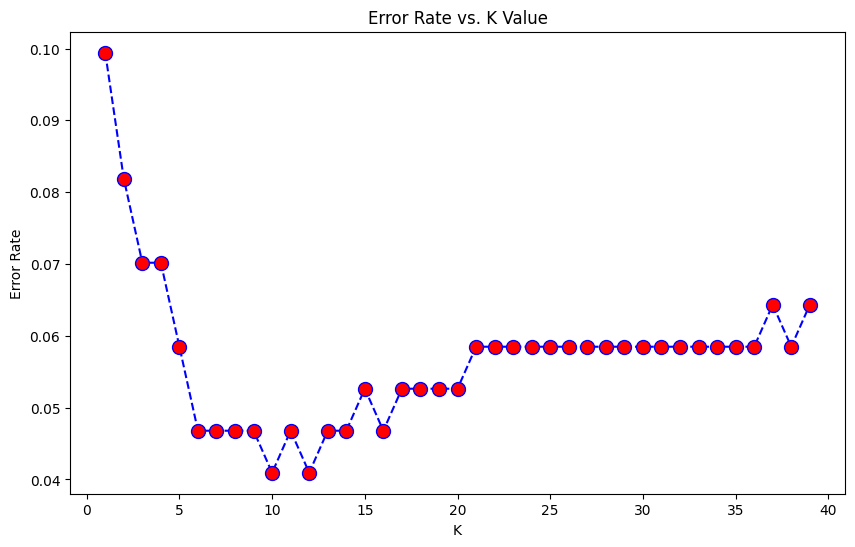

In [6]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')

### Train the model with the new `k` value

In [7]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[ 57   3]
 [  5 106]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.97      0.95      0.96       111

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

